In [29]:
import MDAnalysis as mda
import numpy as np
from mdcraft.analysis.polymer import EndToEndVector, Gyradius
from matplotlib import pyplot as plt

In [8]:
u = mda.Universe('../samples/input.data', '../samples/drop.lammpstrj',format='LAMMPSDUMP')
ag = u.select_atoms('type 1 or type 2 or type 3')

In [36]:
e2e = EndToEndVector(ag,n_chains=1,n_monomers=40, unwrap=True)

/home/pjwalker/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py:721: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


In [37]:
e2e.run()

  0%|          | 0/301 [00:00<?, ?it/s]

/home/pjwalker/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


0it [00:00, ?it/s]

In [38]:
e2e.results

{'acf': array([[[ 1.00000000e+00,  8.95948860e-01,  8.61728170e-01,
          8.40209048e-01,  8.56414450e-01,  8.54739694e-01,
          8.17777559e-01,  8.04865273e-01,  7.98814312e-01,
          7.99106782e-01,  7.86191862e-01,  7.75202739e-01,
          7.65036959e-01,  7.51464091e-01,  7.46575190e-01,
          7.41062135e-01,  7.29739949e-01,  7.22288271e-01,
          7.14990453e-01,  7.20433166e-01,  7.04253439e-01,
          6.89120546e-01,  6.81408442e-01,  6.80654932e-01,
          6.74955684e-01,  6.63249690e-01,  6.53051963e-01,
          6.44475461e-01,  6.31364491e-01,  6.13107016e-01,
          5.98620149e-01,  5.89629081e-01,  5.74550952e-01,
          5.62512643e-01,  5.49746994e-01,  5.39362048e-01,
          5.22238781e-01,  5.05213853e-01,  4.86169769e-01,
          4.73731909e-01,  4.60009116e-01,  4.44518394e-01,
          4.28208548e-01,  4.13656575e-01,  3.95527298e-01,
          3.80493894e-01,  3.70542888e-01,  3.56428424e-01,
          3.37108425e-01,  3.139

In [39]:
abs_e2e = np.zeros(len(e2e._e2e))

for i in range(len(e2e._e2e)):
    abs_e2e[i] = np.linalg.norm(e2e._e2e[i])

abs_e2e

array([ 1.96209354,  3.05908353,  4.92565374,  4.47002588,  3.10241707,
        4.39454496,  2.73436975,  1.47109459,  3.09432733,  3.40863049,
        1.846158  ,  4.19563812,  3.53754691,  1.81652488,  1.41408337,
        3.88129066,  3.63697454,  1.04368013,  3.04542737,  1.16644546,
       18.61744819, 21.55503207, 22.00019072, 21.6175957 , 22.78812942,
       18.3978496 , 23.07704043, 27.23081818, 28.10990515, 27.36816627,
       45.82543297, 47.16578989, 38.87441853, 40.9549921 , 39.12424917,
       37.38197593, 43.94634949, 42.67934495, 40.21509892, 39.74573979,
       39.59314045, 40.88081919, 42.77181957, 38.05688748, 38.41367755,
       39.14184022, 37.62443191, 36.62274978, 20.36361964, 20.28651387,
       19.2683051 , 22.31578493, 20.39507915, 22.33210823, 19.72601904,
       22.51497086, 23.66229136, 23.92993791, 20.52652439, 19.32248157,
       19.55671521, 20.74588483, 20.96815266, 19.52639361, 22.43127281,
       19.9351354 , 18.75353281, 19.01442701, 18.43002046, 27.44

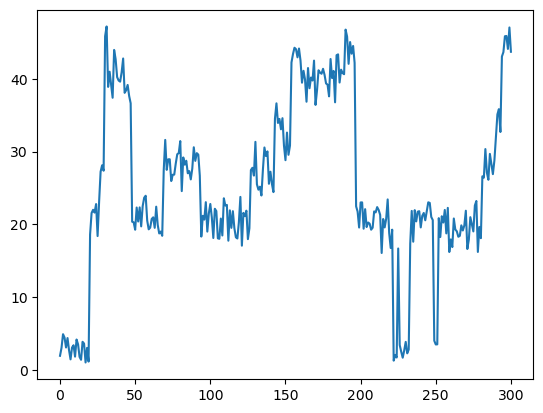

In [40]:
plt.plot(e2e.results.times,abs_e2e)